# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

Открытие файла, внесение небольших настроек, просмотр первых строк:

In [ ]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', 29)

data.head(60)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


Общий взгляд на данные:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построение гистограмм для перноначального взгляда на ситуацию:

Text(0.5, 1.0, 'Гистограммы')

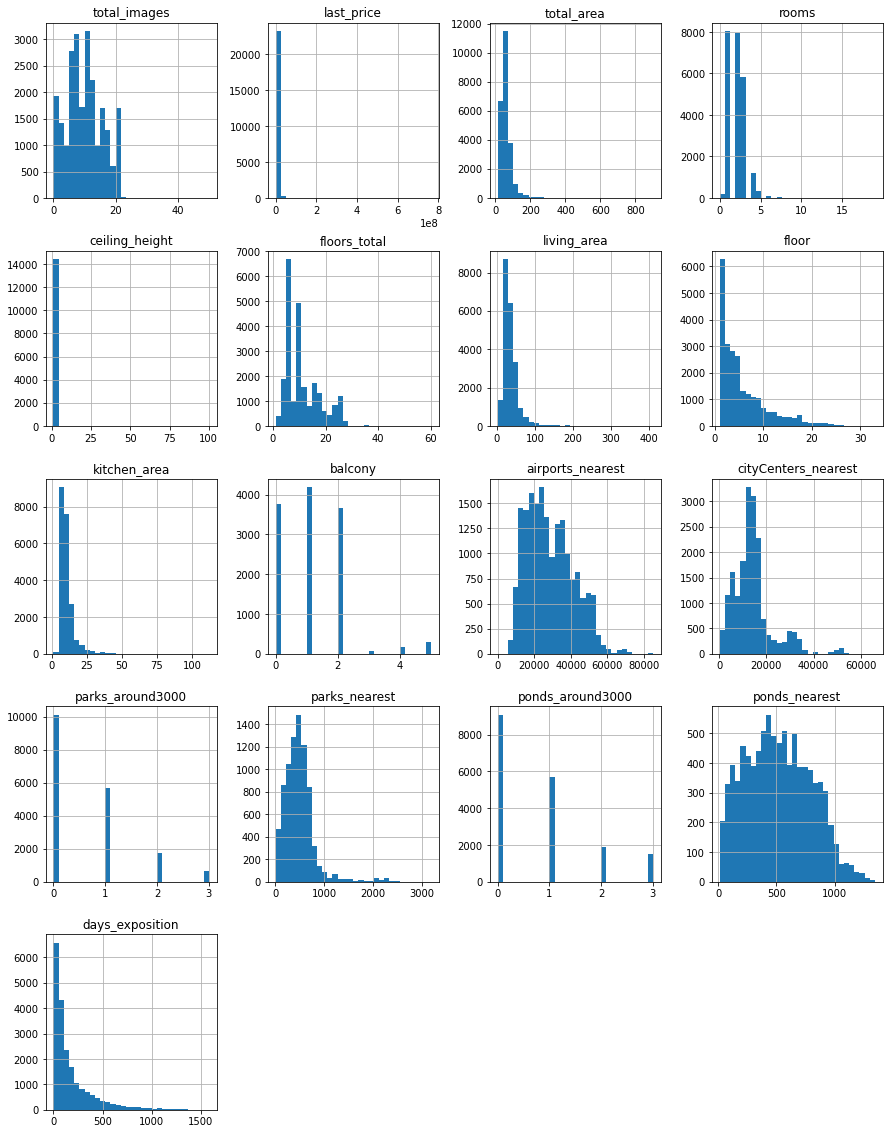

In [ ]:
data.hist(
    figsize=(15, 20),
    bins=30
)
plt.title('Гистограммы')

ВЫВОД

Файл с исходными данными открыт и изучен. Требуется проведение предобработки данных.

### Выполните предобработку данных

#### Поиск и изучение пропущенных значений в столбцах

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<AxesSubplot:>

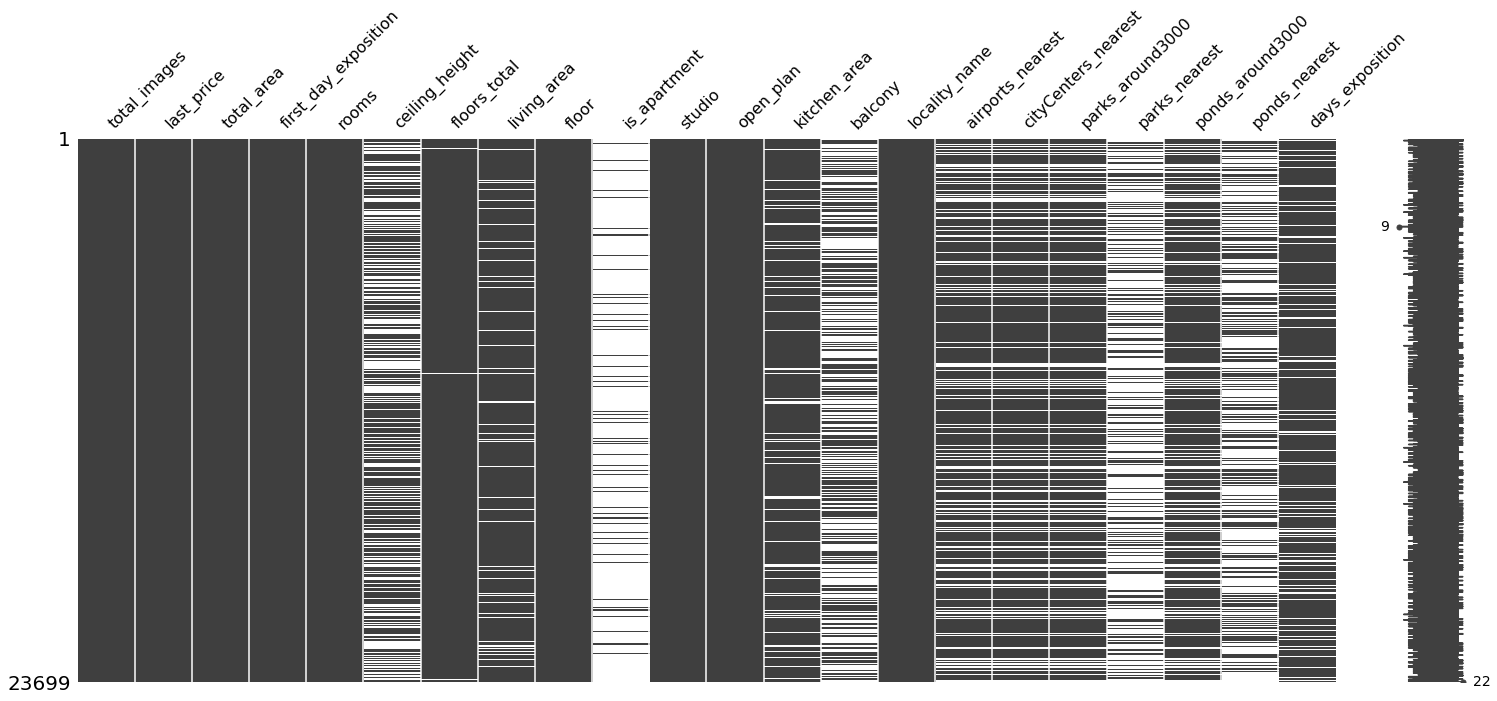

In [ ]:
%matplotlib inline
msno.matrix(data)

<AxesSubplot:>

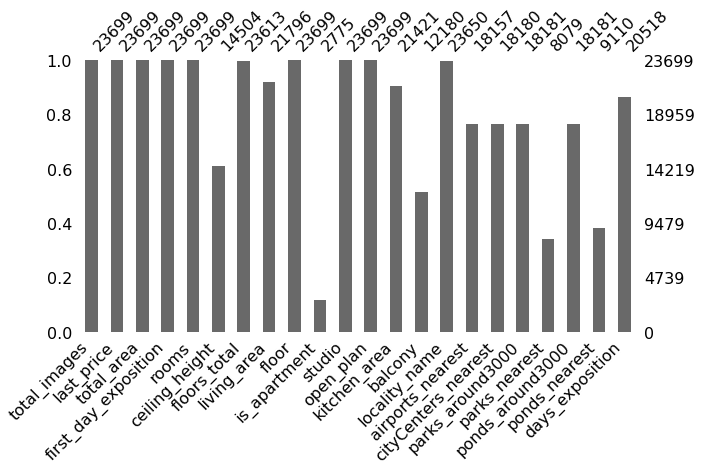

In [ ]:
msno.bar(data, figsize=(10,5))

Пропусков много. Теперь подробнее по каждому столбцу с пропусками:

1) ceiling_height

Большое количество пропусков (почти 39%).
Удаление этих пропусков может сильно повлиять на репрезентативность выборки. Можно взять среднее арифметическое значение,предварительно привязавшись к этажности зданий, но такая группировка выглядит излишней из-за того, что, например, для 5-ти этажного здания высота потолка может быть как 2,56 м, так и 3,05 м. Поэтому остновимся на среднем арифметическом значении от общего диапазона высоты потолков (предварительно проверив на выпадающие значения).

Пропуски могли появиться из-за того, что этот параметр был необязателен для заполнения.

In [ ]:
# заполнение пропусков в ceiling_height средним арифметическим значением
data['ceiling_height'].unique()

'''Видны выпадающие значения: слишком большие значения (20 м, 100 м и т.п.) и слишком маленькие (1.2 м и т.п.)
Примем диапазон высот потолков, которые наиболее распостранены:
2.4 м (старый жилой фонд) - 5.0 м (первые этажи, мансардные этажи современных зданий)
'''

data['ceiling_height'] = data['ceiling_height'].fillna(data[(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 5)]['ceiling_height'].mean().round(2))

# print(data['ceiling_height'].value_counts())
# print()
print('Количество пропусков:', data['ceiling_height'].isna().sum())

Количество пропусков: 0


2) floors_total

Число пропусков всего 0,4% от общего числа значений в столбце.
Заполнение каким-то логичных значением - затруднительно.

По идее, число этажей должно автоматически добавляться при выборе адреса дома/типа дома, и, возможно, для каких-то типов домов значения высотности не было.

Удаление пропусков практически не исказит данные (но согласно предписанию данного проекта оставляем пропуски нетронутыми).

3) living_area

Число пропусков - 8% от общего числа значений в столбце.
Жилая площадь - площадь комнат. Т.е. общая площадь минус площади кухни, санузла(ов), коридоров (площадь балконов/лоджий не входит в общую площадь). Т.к. данные о площади с/узлов, площади коридоров отсутствуют, то вычислить жилую площадь на месте пропусков затруднительно.

Пропуски могли возникнуть из-за того, что при создании объявления данный параметр вводить необязательно.

На данном этапе оставляем пропуски.


4) is_apartment

Очень много пропусков. По-хорошему, столбец должен иметь данные с типом bool. Посмотрим, какие значения  имеются в этом столбце, помимо пропусков:

In [ ]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Таким образом, имеем ситуацию с 50 подтвержденными апартаментами (0,2% от всех значений).
Беглый взгляд на сайт Я.недвижимости с объявлениями на продажу квартир в СПб и ЛО показал, что апартаменты составляют порядка 4% от всех объявлений с квартирами. Небольшой процент относительно основной массы,
Исходя из этого предположим, что пропущенные значения - это не апарты, а квартиры.   

Похоже, что пользователи, если знают, что у них апартаменты, отмечают это строго, а те, у кого квартира, просто оставляют отметку is_apartment без внимания.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)

print(data['is_apartment'].value_counts())
print()
print('Количество пропусков:', data['is_apartment'].isna().sum())

False    23649
True        50
Name: is_apartment, dtype: int64

Количество пропусков: 0


5) kitchen_area

Число пропусков - 9,6% от общего числа значений в столбце.
Видимо, параметр не обязателен для заполнения.
Как и в случае с п.3 непонятно, как высчитать площадь кухни исходя только из общей площади и жилой площади.

Пропуски могли появиться из-за того, что этот параметр был необязателен для заполнения.

На данном этапе оставляем пропуски.

6) balcony

Если балконы/лоджии отсутствуют, то ячейки заполнены, как NaN. В этом причина пропусков.

Можно заменить значения пропусков на 0:

In [ ]:
'''
Замена значений сделана ниже в цикле для 'balcony', 'parks_around3000', 'ponds_around3000'

data['balcony'] = data['balcony'].fillna(0)

print(data['balcony'].value_counts())
print()
print('Количество пропусков:', data['balcony'].isna().sum())
'''

"\nЗамена значений сделана ниже в цикле для 'balcony', 'parks_around3000', 'ponds_around3000'\n\ndata['balcony'] = data['balcony'].fillna(0)\n\nprint(data['balcony'].value_counts())\nprint()\nprint('Количество пропусков:', data['balcony'].isna().sum())\n"

7) locality_name

Странно, что не указано название населенного пункта.

С большой долей вероятности в пропусках имелся ввиду Санкт-Петербург, как самый крупный (с большим отрывом) населейнный пункт рассматриваемой территории.
К счастью, число таких пропусков незначительно и составляет 0,2% от общего числа значений в колонке.

Пропуски можно удалить (согласно предписанию данного проекта оставляем пропуски нетронутыми).

8) airports_nearest

Число пропусков ~23%.

Т.к. значения данного параметра были созданы автоматически, то природа пропусков - техническая.

Выведем на экран число уникальных значений столбца:

In [ ]:
data['locality_name'].nunique()
# data[data['airports_nearest'].isna()]

364

Можно было бы заполнить пропуски, предварительно посмотрев расстояние от населенного пункта до ближайшего аэропорта. Но число уникальных значений - велико. Вручную добавлять расстояния для каждого населенного пункта видится нецелесообразным.

Пока оставим пропуски на месте.

9) cityCenters_nearest

Число пропусков ~23%.

Изначально виделать взаимосвязь: если в airports_nearest стоит значение NaN, то и в данном столбце будет NaN. (природа пропусков - техническая).

Но число пропусков в этих стобцах разное. Чуть-чуть "покрутим" данные:

In [ ]:
data[(data['cityCenters_nearest'].isna()) & (data['airports_nearest'].isna())].shape

(5518, 22)

In [ ]:
(data['cityCenters_nearest'].isna()).sum()

5519

Число пропусков в airports_nearest и cityCenters_nearest (одновременно) = 5518;
число пропусков в airports_nearest (в то время, как в cityCenters_nearest есть значение, отличное от 0) = 23;
число пропусков в cityCenters_nearest (в то время, как в airports_nearest есть значение, отличное от 0) = 1.

Пока оставим пропуски на месте.

10) parks_around3000  

Пропуски - технические. Вызваны тем, что при отсутствии парков в радиусе 3 км они просто не отображаются.

Т.о. пропуски можно заменить на 0.

In [ ]:
'''
Замена значений сделана ниже в цикле для 'balcony', 'parks_around3000', 'ponds_around3000'

data['parks_around3000'] = data['parks_around3000'].fillna(0)

print(data['parks_around3000'].value_counts())
print()
print('Количество пропусков:', data['parks_around3000'].isna().sum())
'''

"\nЗамена значений сделана ниже в цикле для 'balcony', 'parks_around3000', 'ponds_around3000'\n\ndata['parks_around3000'] = data['parks_around3000'].fillna(0)\n\nprint(data['parks_around3000'].value_counts())\nprint()\nprint('Количество пропусков:', data['parks_around3000'].isna().sum())\n"

11) parks_nearest

Данная колонка связана с parks_around3000: если значения в parks_around3000 =0 или =Nan, то значение в рассматриваемой колонке = NaN

Природа пропуска - техническая.

Можно было бы заменить на 0, но получится, что парк 'под боком'. Оставим как есть.

In [ ]:
'''
data['parks_nearest'] = data['parks_nearest'].fillna(0)

print(data['parks_nearest'].value_counts())
print()
print('Количество пропусков:', data['parks_nearest'].isna().sum())
'''

"\ndata['parks_nearest'] = data['parks_nearest'].fillna(0)\n\nprint(data['parks_nearest'].value_counts())\nprint()\nprint('Количество пропусков:', data['parks_nearest'].isna().sum())\n"

12) ponds_around3000

Аналогично п.10:
Пропуски - технические. Вызваны тем, что при отсутствии водоемов в радиусе 3 км, они просто не отображаются.

Т.о. пропуски можно заменить на 0.

In [ ]:
'''
Замена значений сделана ниже в цикле для 'balcony', 'parks_around3000', 'ponds_around3000'

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print(data['ponds_around3000'].value_counts())
print()
print('Количество пропусков:', data['ponds_around3000'].isna().sum())
'''

"\nЗамена значений сделана ниже в цикле для 'balcony', 'parks_around3000', 'ponds_around3000'\n\ndata['ponds_around3000'] = data['ponds_around3000'].fillna(0)\nprint(data['ponds_around3000'].value_counts())\nprint()\nprint('Количество пропусков:', data['ponds_around3000'].isna().sum())\n"

In [ ]:
data[['balcony', 'parks_around3000', 'ponds_around3000']].isna().sum()

balcony             11519
parks_around3000     5518
ponds_around3000     5518
dtype: int64

In [ ]:
for column in data[['balcony', 'parks_around3000', 'ponds_around3000']]:
    data[column] = data[column].fillna(0)

data[['balcony', 'parks_around3000', 'ponds_around3000']].isna().sum()

balcony             0
parks_around3000    0
ponds_around3000    0
dtype: int64

13) ponds_nearest

Аналогично п. 11:

Данная колонка связана с ponds_around3000: если значения в ponds_around3000 =0 или =Nan, то значение в рассматриваемой колонке = NaN

Природа пропуска - техническая.

Можно было бы заменить на 0, но тогда могло бы показаться, что пруд находится вощле дома. Оставим пропуски.

In [ ]:
'''
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

print(data['ponds_nearest'].value_counts())
print()
print('Количество пропусков:', data['ponds_nearest'].isna().sum())
'''

"\ndata['ponds_nearest'] = data['ponds_nearest'].fillna(0)\n\nprint(data['ponds_nearest'].value_counts())\nprint()\nprint('Количество пропусков:', data['ponds_nearest'].isna().sum())\n"

14) days_exposition

Число пропусков - 13,4%.

Они могут быть связаны с тем, что объявление еще не снято с публикации (т.е. лот все еще находится в продаже или объявление просто забыли закрыть).

Если лот все еще продается, то можно посчитать количество дней, использовав дату на текущий момент. Но как быть, если объявление просто забыли снять с публикации, а объект продан? Оставим пропуски не заполненными.


#### Рассмотрение типов данных в каждом столбце

Снова взглянем на информацию о датафрейме:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   


0) total_images, <br>
4) rooms, <br>
8) floor, <br>
12) kitchen_area

Тип int64, все хорошо

1) last_price

Тип float64. Можно перевести в int64 (будет занимать чуть меньше памяти), т.к. после запятой всегда стоит 0.

In [ ]:
data['last_price'] = data['last_price'].astype('int32')
data['last_price'].dtype

dtype('int32')

2) total_area, <br>
5) ceiling_height, <br>
7) living_area           

Тип float64. Подходит.

3) first_day_exposition  

Тип object нужно перевети в дату. С учетом того, что в данном столбце время имеет значение 00:00:00, то оставим только год-месяц-день:

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

6) floors_total

Тип float64. Можно было быперевести в int64 (будет занимать чуть меньше памяти), т.к. число этажей - целочисленное значение, но в текущем столбце есть пропущенные значения, которые нельзя перевести в int64.

9) is_apartment

Тип bool. Произвели замену типа данных ранее (был object).

10) studio, <br>
11) plan

Тип данных - bool. Как надо.

13) balcony

Тип float64 можно перевести в int64 (т.к. число балконов - целое число):

In [ ]:
data['balcony'] = data['balcony'].astype('int32')
data['balcony'].dtype

dtype('int32')

14) locality_name

Тип object. Подходит.

15) airports_nearest, <br>
16) cityCenters_nearest, <br>
18) parks_nearest,<br>
20) ponds_nearest <br>
21) days_exposition

Имеют тип float64. Однако по факту значения округлены до целых чисел. Изменить тип на int64 не позволяют пропущенные значения.

17) parks_around3000,<br>
19) ponds_around3000,<br>


Тип float64 можно перевести в int64 (т.к. количество парков, водоемов - целое число, а расстояние до парков и водоемов округлены до метров):

In [ ]:
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].astype('int32')
print(data['parks_around3000'].dtype)
print(data['ponds_around3000'].dtype)

int32
int32


Датафрейм после преобразований типов:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Изучение уникальных значений в столбце с названиями и устранение неявных дубликатов

In [ ]:
print(data['locality_name'].unique())
print()
print('Количество уникальных объектов:', data['locality_name'].nunique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Устранение неявных дубликатов:

In [ ]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .str.replace('городской поселок', 'поселок городского типа')
    .replace(['поселок Мурино'], 'Мурино', regex=True)
    .replace(['Кудрово'], 'деревня Кудрово', regex=True)
    .replace(['Никольское'], 'село Никольское', regex=True)
    .replace(['поселок Рябово'], 'поселок городского типа Рябово', regex=True)
)

print('Количество уникальных объектов:', data['locality_name'].nunique())

Количество уникальных объектов: 321


Проверим датафрейм на наличие явных дубликатов:

In [ ]:
data.duplicated().sum()

0

ВЫВОД

Проведена предварительная обработка данных:
- пропуски заполнены там, где это возможно;
- изменен тип данных некоторых признаков;
- удалены неявные дубликаты;
- произведена проверка на наличие явных дубликатов (они отсутствуют).


#### Добавьте в таблицу новые столбцы:

1) цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой):

In [ ]:
data['sq_meter_cost'] = (data['last_price'] / data['total_area']).round(2)
data['sq_meter_cost']

0       120370.37
1        82920.79
2        92785.71
3       408176.10
4       100000.00
           ...   
23694    72490.85
23695    52542.37
23696    44091.71
23697   149511.40
23698    41795.67
Name: sq_meter_cost, Length: 23699, dtype: float64

2) день недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [ ]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data[['first_day_exposition', 'exposition_weekday']].head()

,first_day_exposition,exposition_weekday
0,2019-03-07,3
1,2018-12-04,1
2,2015-08-20,3
3,2015-07-24,4
4,2018-06-19,1


3) месяц публикации объявления:

In [ ]:
data['exposition_month'] = data['first_day_exposition'].dt.month
data[['first_day_exposition', 'exposition_month']].head()

,first_day_exposition,exposition_month
0,2019-03-07,3
1,2018-12-04,12
2,2015-08-20,8
3,2015-07-24,7
4,2018-06-19,6


4) год публикации объявления:

In [ ]:
data['exposition_year'] = data['first_day_exposition'].dt.year
data[['first_day_exposition', 'exposition_year']].head()

,first_day_exposition,exposition_year
0,2019-03-07,2019
1,2018-12-04,2018
2,2015-08-20,2015
3,2015-07-24,2015
4,2018-06-19,2018


5) тип этажа квартиры (значения — «первый», «последний», «другой»):

In [ ]:
def typefloor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'


data['floor_type'] = data.apply(typefloor, axis=1)

6) расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [ ]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data[['cityCenters_nearest', 'cityCenters_nearest_km']].head()

,cityCenters_nearest,cityCenters_nearest_km
0,16028.00,16.00
1,18603.00,19.00
2,13933.00,14.00
3,6800.00,7.00
4,8098.00,8.00


ВЫВОД

В датафрейм добавлены новые столбцы, которые помогут в исследовательском анализе.

### Проведите исследовательский анализ данных

#### Изучение параметров объектов, построение гистограмм

In [ ]:
# Взглянем на описание DataFrame, предварительно немного настроив отображение:
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_cost,exposition_weekday,exposition_month,exposition_year,cityCenters_nearest_km
count,23699.00,23699.00,23699.00,23699.00,23699.00,23613.00,21796.00,23699.00,21421.00,23699.00,18157.00,18180.00,23699.00,8079.00,23699.00,9110.00,20518.00,23699.00,23699.00,23699.00,23699.00,18180.00
mean,9.86,6541548.77,60.35,2.07,2.76,10.67,34.46,5.89,10.57,0.59,28793.67,14191.28,0.47,490.80,0.59,517.98,180.89,99421.66,2.57,6.40,2017.37,14.18
std,5.68,10887013.27,35.65,1.08,0.99,6.60,22.03,4.89,5.91,0.96,12630.88,8608.39,0.75,342.32,0.88,277.72,219.73,50306.80,1.79,3.49,1.04,8.62
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,111.83,0.00,1.00,2014.00,0.00
25%,6.00,3400000.00,40.00,1.00,2.60,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00,76585.47,1.00,3.00,2017.00,9.00
50%,9.00,4650000.00,52.00,2.00,2.73,9.00,30.00,4.00,9.10,0.00,26726.00,13098.50,0.00,455.00,0.00,502.00,95.00,95000.00,3.00,6.00,2017.00,13.00
75%,14.00,6800000.00,69.90,3.00,2.73,16.00,42.30,8.00,12.00,1.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00,114256.32,4.00,10.00,2018.00,16.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00,1907500.00,6.00,12.00,2019.00,66.00


##### Изучим данные в столбце total_area:

Видим, что наибольшее значение площади (900) сильно отличается от медианы.
Посмотрим, что скрывается за этим выдающимся объектом. Далее построим диаграмму размаха.

In [ ]:
data.query('total_area > 800')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_cost,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
19540,8,420000000,900.00,2017-12-06,12,2.80,25.00,409.70,25,False,False,False,112.00,0,Санкт-Петербург,30706.00,7877.00,0,NaN,2,318.00,106.00,466666.67,2,12,2017,последний,8.00


↑ Что-то на богатом, хотя для такого дворца можно было сделать потолки повыше.
Видимо, многие признаки этого объекта тоже будут в дальнейшем определены, как выбросы.

Text(0.5, 1.0, 'Диаграмма размаха')

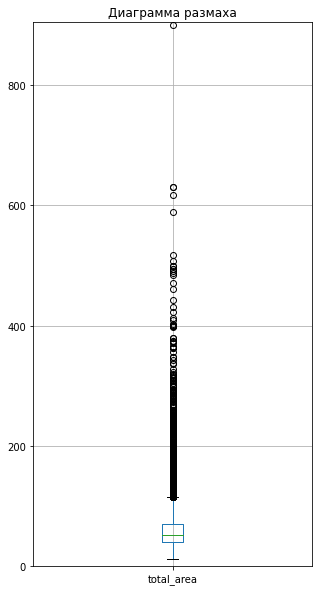

In [ ]:
data.boxplot('total_area', figsize=(5,10))
plt.ylim(0, 905)
plt.xlim(0, 2)
plt.title('Диаграмма размаха')

За границами 1,5 межквартильного размаха лежат выбросы. Его границы: нижняя - 12 кв.м (граница нижнего 'уса'); верхняя - Q3+1.5IQR=114.75 кв.м.
Отфильтруем данные в границах 12-115 кв.м:

Text(0, 0.5, 'Количество значений')

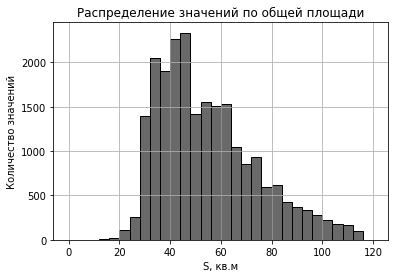

In [ ]:
(data
    .query('total_area >= 12 and total_area < 115')
    .hist('total_area', bins=30, range=(0,120), figsize=(6,4), color='dimgrey', edgecolor = 'black')
)
plt.title('Распределение значений по общей площади')
plt.xlabel('S, кв.м')
plt.ylabel('Количество значений')

Распределение становится похожим на нормальное, хотя и есть локальные пики. Наиболее популярны лоты с общей площадью, равной 40-48 кв.м.

##### Изучим данные в столбце living_area:

Царь-лот из п.3.1.1 дает выдающуюся жилую площадь - 409.7 кв.м.
При этом минимальная жилая площадь выглядит неправдоподобно маленькой - 2.0 кв.м (ванная комната же не является жилой?)

Посмотрим на объекты с очень маленькой жилой площадью. Далее -  на диаграмму размаха:

In [ ]:
data.query('living_area <= 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_cost,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
3242,7,4440000,41.00,2017-07-02,1,2.73,17.00,3.00,17,False,False,False,11.00,0,Санкт-Петербург,19272.00,13073.00,0,NaN,0,NaN,216.00,108292.68,6,7,2017,последний,13.00
13915,20,6350000,52.00,2018-02-06,2,3.00,6.00,2.00,2,False,False,False,9.00,0,Санкт-Петербург,32453.00,6521.00,0,NaN,1,1012.00,91.00,122115.38,1,2,2018,другой,7.00
17582,11,2680000,22.00,2018-08-11,0,2.73,25.00,5.00,8,False,True,False,NaN,2,Санкт-Петербург,22735.00,11618.00,1,835.00,1,652.00,70.00,121818.18,5,8,2018,другой,12.00
21758,0,2330000,23.00,2018-01-01,0,2.73,24.00,2.00,22,False,True,False,NaN,0,Мурино,NaN,NaN,0,NaN,0,NaN,66.00,101304.35,0,1,2018,другой,NaN
23574,14,64990000,139.00,2015-11-24,3,3.00,8.00,3.00,8,False,False,False,16.00,1,Санкт-Петербург,33255.00,5975.00,1,630.00,3,100.00,280.00,467553.96,1,11,2015,последний,6.00


↑ 5 объектов с размером жилой площадью, которая меньше, чем площадь кухни в маленькой 'хрущевке'.. Но вместе с этим, общая площадь - вполне нормальная.

Text(0.5, 1.0, 'Диаграмма размаха')

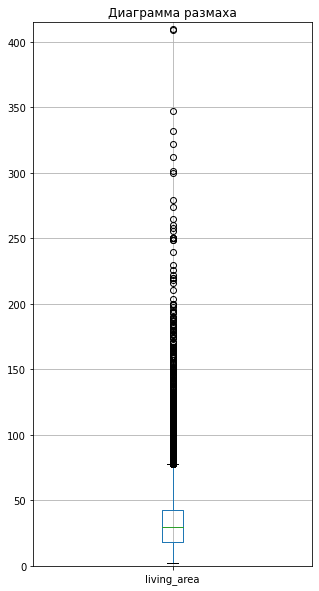

In [ ]:
data.boxplot('living_area', figsize=(5,10))
plt.ylim(0, 415)
plt.xlim(0, 2)
plt.title('Диаграмма размаха')

По аналогии с п.3.1.1 определим границы нормальных значений.
Интересно, что столь малые площади (2-5 кв.м) попадает в нормальные значения. Не будем включать их в срез. Отфильтруем данные в границах 5-78 кв.м :

Text(0, 0.5, 'Количество значений')

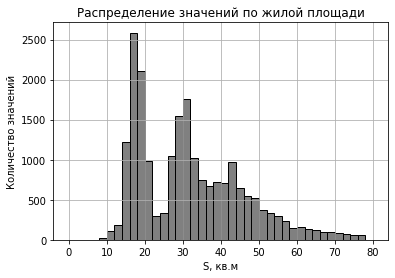

In [ ]:
(data
    .query('living_area > 5 and living_area < 78')
    .hist('living_area', bins=40, range=(0,80), figsize=(6,4), color='grey', edgecolor = 'black')
)
plt.title('Распределение значений по жилой площади')
plt.xlabel('S, кв.м')
plt.ylabel('Количество значений')

Распределение не выглядит нормальным. Хотя ожидалась корреляция с общей площадью. Самая часто встречающаяся жилая площадь: 16-20 кв.м и 28-32 кв.м.

##### Изучим данные в столбце kitchen_area:

Подозрительно маленькое значение минимальной площади кухни - 1.3 кв.м. Возможно, это зонирование в маленькой квартире-студии.
Среднее и медианное значения выглядят правдоподобными.

In [ ]:
data.query('kitchen_area <= 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_cost,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
906,15,2600000,27.00,2017-07-10,1,2.75,23.00,18.00,18,False,False,False,2.00,0,Санкт-Петербург,22131.00,17459.00,0,NaN,1,411.00,10.00,96296.30,0,7,2017,другой,17.00
2165,15,3180000,25.00,2019-03-21,1,2.50,25.00,17.00,17,False,False,False,3.00,0,Мурино,NaN,NaN,0,NaN,0,NaN,19.00,127200.00,3,3,2019,другой,NaN
6084,6,770000,18.00,2017-10-16,1,2.73,5.00,13.00,4,False,False,False,3.00,0,Тихвин,NaN,NaN,0,NaN,0,NaN,90.00,42777.78,0,10,2017,другой,NaN
6262,9,3100000,24.00,2018-06-25,2,3.00,5.00,16.00,5,False,False,False,2.00,0,Санкт-Петербург,31960.00,4914.00,2,426.00,1,936.00,54.00,129166.67,0,6,2018,последний,5.00
7950,3,5967734,66.40,2017-02-07,2,2.73,4.00,44.40,2,False,False,False,2.89,0,Санкт-Петербург,44870.00,20802.00,0,NaN,0,NaN,335.00,89875.51,1,2,2017,другой,21.00
8729,9,2200000,18.40,2018-08-20,1,2.52,3.00,14.00,3,False,False,False,2.40,0,Пушкин,20710.00,30687.00,0,NaN,1,155.00,59.00,119565.22,0,8,2018,последний,31.00
9138,17,2920000,23.29,2018-12-12,1,2.73,3.00,21.00,1,False,False,False,2.00,0,Санкт-Петербург,19506.00,4008.00,0,NaN,2,45.00,107.00,125375.70,2,12,2018,первый,4.00
10208,3,1900000,17.00,2018-08-14,1,2.75,4.00,13.00,2,False,False,False,3.00,0,Санкт-Петербург,25072.00,5639.00,0,NaN,0,NaN,7.00,111764.71,1,8,2018,другой,6.00
11033,6,5350000,32.00,2016-04-20,1,2.73,14.00,16.00,10,False,False,False,2.00,0,Санкт-Петербург,19008.00,3953.00,0,NaN,1,69.00,210.00,167187.50,2,4,2016,другой,4.00
13814,14,3650000,28.00,2017-08-24,1,2.60,19.00,18.00,10,False,False,False,3.00,2,Санкт-Петербург,35068.00,16167.00,0,NaN,0,NaN,64.00,130357.14,3,8,2017,другой,16.00


↑ Довольно много маленьких кухонь. Одновременно с этим, квартиры не обозначены, как студии. При этом общая площадь - достаточно разнообразная. Построим диаграмму размаха:

Text(0.5, 1.0, 'Диаграмма размаха')

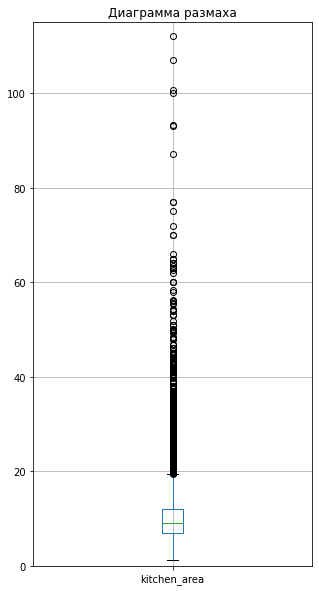

In [ ]:
data.boxplot('kitchen_area', figsize=(5,10))
plt.ylim(0, 115)
plt.xlim(0, 2)
plt.title('Диаграмма размаха')

Отфильтруем данные в границах нормальных значений (1.3 - 19.5):

Text(0, 0.5, 'Количество значений')

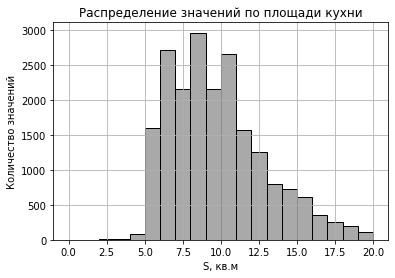

In [ ]:
(data
    .query('kitchen_area > 1.3 and kitchen_area < 19.5')
    .hist('kitchen_area', bins=20, range=(0,20), figsize=(6,4), color='darkgrey', edgecolor = 'black')
)
plt.title('Распределение значений по площади кухни')
plt.xlabel('S, кв.м')
plt.ylabel('Количество значений')

'Рваное' распределение значений с несколькими пиками (шаг 1 кв.м). Самые популярные кухни - 6-7 кв.м, 8-9 кв.м, 10-11 кв.м

##### Изучим данные в столбце last_price:

Метод describe() позволяет увидеть большой разброс в ценах. Интерено взглянуть на лоты с min и max ценой:

In [ ]:
data.query('last_price == last_price.max() or last_price == last_price.min()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_cost,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
8793,7,12190,109.00,2019-03-20,2,2.75,25.00,32.00,25,False,False,False,40.50,0,Санкт-Петербург,36421.00,9176.00,1,805.00,0,NaN,8.00,111.83,2,3,2019,последний,9.00
12971,19,763000000,400.00,2017-09-30,7,2.73,10.00,250.00,10,False,False,False,NaN,2,Санкт-Петербург,25108.00,3956.00,1,530.00,3,756.00,33.00,1907500.00,5,9,2017,последний,4.00


В процессе анализа данного столбца стало понятно, что работать с большим количеством нулей неудобно. Изменим размерность стоимости (млн):

In [ ]:
data['last_price'] = data['last_price'] / 1000000

12190 (теперь 0.01) - возможно, 'потерялись' нули, а возможно, какое-то спам-объявление. Посмотрим какие еще есть дешевые квартиры:

In [ ]:
data.query('last_price < 0.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_cost,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
5698,7,0.45,42.00,2017-07-31,2,2.73,1.00,23.00,1,False,False,False,5.80,0,поселок городского типа Будогощь,NaN,NaN,0,NaN,0,NaN,233.00,10714.29,0,7,2017,первый,NaN
6859,6,0.49,40.00,2017-12-11,1,2.73,5.00,NaN,3,False,False,False,NaN,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,43.00,12250.00,0,12,2017,другой,NaN
8793,7,0.01,109.00,2019-03-20,2,2.75,25.00,32.00,25,False,False,False,40.50,0,Санкт-Петербург,36421.00,9176.00,1,805.00,0,NaN,8.00,111.83,2,3,2019,последний,9.00
9581,7,0.45,43.40,2018-08-31,2,2.73,5.00,30.30,3,False,False,False,5.50,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,96.00,10368.66,4,8,2018,другой,NaN
10782,3,0.49,29.10,2016-05-05,1,2.50,5.00,17.00,5,False,False,False,5.50,0,Сланцы,NaN,NaN,0,NaN,0,NaN,719.00,16838.49,3,5,2016,последний,NaN
14911,5,0.43,54.00,2018-06-26,2,2.73,3.00,NaN,3,False,False,False,NaN,0,поселок станции Свирь,NaN,NaN,0,NaN,0,NaN,44.00,7962.96,1,6,2018,последний,NaN
16032,8,0.48,32.00,2019-01-06,1,2.73,2.00,16.00,1,False,False,False,NaN,0,Сланцы,NaN,NaN,0,NaN,0,NaN,83.00,15000.00,6,1,2019,первый,NaN
16219,14,0.45,38.50,2018-07-11,2,2.65,2.00,NaN,1,False,False,False,NaN,0,деревня Вахнова Кара,NaN,NaN,0,NaN,0,NaN,45.00,11688.31,2,7,2018,первый,NaN
16274,18,0.44,40.00,2018-07-10,1,2.73,5.00,NaN,1,False,False,False,NaN,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.00,11000.00,1,7,2018,первый,NaN
17456,7,0.43,30.40,2019-04-22,1,2.73,2.00,16.00,1,False,False,False,6.00,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN,14144.74,0,4,2019,первый,NaN


В перечне лотов с низкой ценой - не СПб, за исключением квартиры с аномально низкой ценой. Выглядит в целом реалистично.

Изменим стоимость самой дешевой квартиры с 12190 до 12.19 млн. (все-таки квартира  площадью 109 кв.м в Петербурге не будет стоить дешево):

In [ ]:
data['last_price'] = data['last_price'].where(data['last_price'] != data['last_price'].min(), data['last_price'] * 1000)

# проверим изменение значения:
print(data.query('index == 8793'))

      total_images  last_price  total_area first_day_exposition  rooms  \
8793             7       12.19      109.00           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
8793            2.75         25.00        32.00     25         False   False   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
8793      False         40.50        0  Санкт-Петербург          36421.00   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8793              9176.00                 1         805.00                 0   

      ponds_nearest  days_exposition  sq_meter_cost  exposition_weekday  \
8793            NaN             8.00         111.83                   2   

      exposition_month  exposition_year floor_type  cityCenters_nearest_km  
8793                 3             2019  последний                    9.00  


In [ ]:
# Текущая минимальная стоимость лота
data['last_price'].min()

0.43

Text(0.5, 1.0, 'Диаграмма размаха')

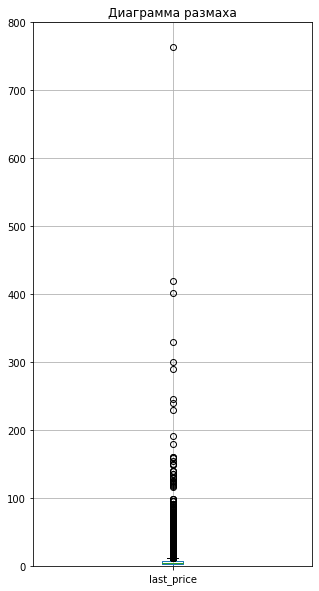

In [ ]:
data.boxplot('last_price', figsize=(5,10))
plt.ylim(0, 800)
plt.xlim(0, 2)
plt.title('Диаграмма размаха')

Отфильтруем данные в границах нормальных значений (430000 - 11900000):

Text(0, 0.5, 'Количество значений')

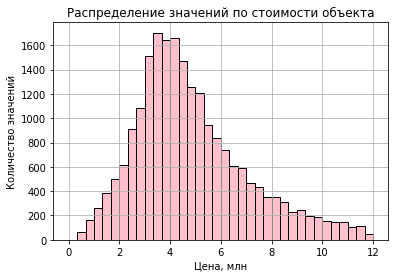

In [ ]:
(data
    .query('last_price > 0.43 and last_price < 11.9')
    .hist('last_price', bins=36, range=(0,12), figsize=(6,4), color='pink', edgecolor = 'black')
)
plt.title('Распределение значений по стоимости объекта')
plt.xlabel('Цена, млн')
plt.ylabel('Количество значений')

Распределение выглядит хорошо (как нормальное). Самые популярные цены: 3.0-4.25 млн.

In [ ]:
##### Изучим данные в столбце rooms:

Количество комнат выглядит разумно, кроме максимального значения: 19. Посмотрим:

In [ ]:
data.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_cost,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
648,3,17.50,183.70,2018-07-01,11,3.40,7.00,138.80,7,False,False,False,13.30,0,Санкт-Петербург,23606.00,3148.00,0,NaN,0,NaN,NaN,95264.02,6,7,2018,последний,3.00
866,5,25.00,363.00,2017-12-23,14,3.16,5.00,222.00,4,False,False,False,16.60,0,Санкт-Петербург,38076.00,7950.00,0,NaN,2,435.00,418.00,68870.52,5,12,2017,другой,8.00
5358,20,65.00,590.00,2019-02-14,15,3.50,6.00,409.00,3,False,False,False,100.00,0,Санкт-Петербург,24447.00,4666.00,1,767.00,0,NaN,14.00,110169.49,3,2,2019,другой,5.00
9688,8,33.00,194.10,2017-02-07,11,3.43,5.00,129.00,2,False,False,False,11.90,0,Санкт-Петербург,21469.00,1015.00,1,686.00,2,66.00,813.00,170015.46,1,2,2017,другой,1.00
14498,6,32.25,374.60,2018-06-09,19,2.73,5.00,264.50,2,False,False,False,27.60,0,Санкт-Петербург,19497.00,3574.00,0,NaN,2,548.00,114.00,86091.83,5,6,2018,другой,4.00
18848,6,28.50,270.00,2015-03-02,16,3.00,4.00,180.00,4,False,False,False,13.00,1,Санкт-Петербург,23575.00,4142.00,1,516.00,0,NaN,1365.00,105555.56,0,3,2015,последний,4.00
19540,8,420.00,900.00,2017-12-06,12,2.80,25.00,409.70,25,False,False,False,112.00,0,Санкт-Петербург,30706.00,7877.00,0,NaN,2,318.00,106.00,466666.67,2,12,2017,последний,8.00
20829,6,28.66,245.40,2016-03-31,14,2.73,4.00,168.30,2,False,False,False,25.90,0,Санкт-Петербург,21104.00,2054.00,3,541.00,2,118.00,95.00,116784.84,3,3,2016,другой,2.00


↑ Количество комнат > 10 - не единичный случай. Может быть, продаются целые здания? Что по квартирам 'без комнат':

In [ ]:
data.query('rooms == rooms.min()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_cost,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
144,1,2.45,27.00,2017-03-30,0,2.73,24.00,15.50,2,False,True,False,NaN,2,Мурино,NaN,NaN,0,NaN,0,NaN,181.00,90740.74,3,3,2017,другой,NaN
349,4,2.32,25.00,2017-09-27,0,2.73,14.00,17.00,1,False,False,True,NaN,0,деревня деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.00,92800.00,2,9,2017,первый,NaN
440,8,2.48,27.11,2018-03-12,0,2.73,17.00,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.00,15015.00,0,NaN,2,982.00,64.00,91479.16,0,3,2018,другой,15.00
508,0,3.38,34.40,2017-03-28,0,2.73,26.00,24.30,19,False,False,True,NaN,1,поселок Парголово,53115.00,19292.00,0,NaN,1,593.00,430.00,98110.47,1,3,2017,другой,19.00
608,2,1.85,25.00,2019-02-20,0,2.73,10.00,NaN,7,False,True,False,NaN,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.00,74000.00,2,2,2019,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3.20,26.00,2017-09-01,0,2.73,25.00,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405.00,13222.00,0,NaN,1,623.00,14.00,123076.92,4,9,2017,другой,13.00
23442,0,2.50,27.70,2017-09-28,0,2.73,24.00,18.00,4,False,False,True,NaN,2,Мурино,NaN,NaN,0,NaN,0,NaN,4.00,90252.71,3,9,2017,другой,NaN
23554,15,3.35,26.00,2018-09-07,0,2.73,19.00,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090.00,17092.00,0,NaN,2,112.00,31.00,128846.15,4,9,2018,другой,17.00
23592,10,1.45,29.00,2017-11-11,0,2.73,9.00,18.00,8,False,False,True,NaN,2,село Никольское,NaN,NaN,0,NaN,0,NaN,82.00,50000.00,5,11,2017,другой,NaN


↑ Количество комнат, равное 0 можно оправдать для студий. Но есть лоты, которые не отмечены, как студии и при этом количество комнат тоже равно 0...

Диаграмма размаха:

Text(0.5, 1.0, 'Диаграмма размаха')

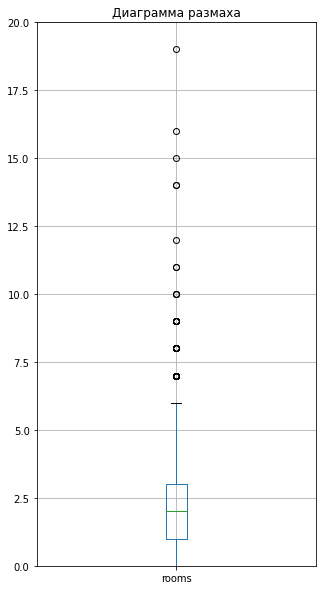

In [ ]:
data.boxplot('rooms', figsize=(5,10))
plt.ylim(0, 20)
plt.xlim(0, 2)
plt.title('Диаграмма размаха')

Отфильтруем данные в границах нормальных значений (0 - 6):

Text(0, 0.5, 'Количество значений')

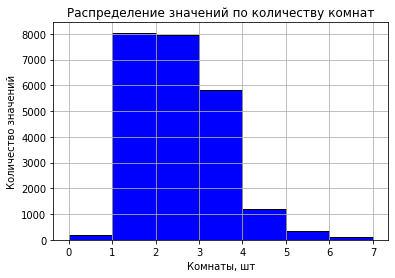

In [ ]:
(data
    .query('rooms <= 6')
    .hist('rooms', bins=7, range=(0,7), figsize=(6,4), color='b', edgecolor = 'black')
)
plt.title('Распределение значений по количеству комнат')
plt.xlabel('Комнаты, шт')
plt.ylabel('Количество значений')

Гистограмма наглядно показывает, что квартир 'без комнат' - мало. Основные - одно-, двухкомнатные квартиры.

##### Изучим данные в столбце ceiling_height:

Согласно describe() макималная высота потолка = 100 м, минимальная = 1 м. Высота потолков должна быь хотя бы 2.4 м (минимум). Посмотрим на выборку 'высоких' потолков:

In [ ]:
data.query('ceiling_height > 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_cost,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
355,17,3.60,55.20,2018-07-12,2,25.00,5.00,32.00,2,False,False,False,NaN,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.00,65217.39,3,7,2018,другой,NaN
464,15,66.57,280.30,2015-06-11,6,5.20,8.00,159.50,7,False,False,False,21.10,0,Санкт-Петербург,26316.00,6655.00,3,187.00,1,616.00,578.00,237499.11,3,6,2015,другой,7.00
1026,20,155.00,310.00,2018-10-12,5,5.30,3.00,190.00,3,False,False,False,63.00,2,Санкт-Петербург,24899.00,4785.00,0,NaN,1,603.00,NaN,500000.00,4,10,2018,последний,5.00
1388,20,59.80,399.00,2015-01-21,5,5.60,6.00,NaN,6,False,False,False,NaN,0,Санкт-Петербург,26204.00,6934.00,2,149.00,2,577.00,719.00,149874.69,2,1,2015,последний,7.00
3148,14,2.90,75.00,2018-11-12,3,32.00,3.00,53.00,2,False,False,False,8.00,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN,38666.67,0,11,2018,другой,NaN
3474,3,1.40,30.00,2018-03-16,1,8.00,5.00,15.30,2,False,False,False,7.30,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.00,46666.67,4,3,2018,другой,NaN
4643,0,4.30,45.00,2018-02-01,2,25.00,9.00,30.00,2,False,False,False,7.00,1,Санкт-Петербург,12016.00,13256.00,1,658.00,1,331.00,181.00,95555.56,3,2,2018,другой,13.00
4876,7,3.00,25.00,2017-09-27,0,27.00,25.00,17.00,17,False,False,True,NaN,2,Мурино,NaN,NaN,0,NaN,0,NaN,28.00,120000.00,2,9,2017,другой,NaN
5076,0,3.85,30.50,2018-10-03,1,24.00,5.00,19.50,1,True,False,False,5.50,0,Санкт-Петербург,29686.00,8389.00,3,397.00,1,578.00,7.00,126229.51,2,10,2018,первый,8.00
5246,0,2.50,54.00,2017-10-13,2,27.00,5.00,30.00,3,False,False,False,9.00,2,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.00,46296.30,4,10,2017,другой,NaN


Проблема слишком высоких потолков в некорректном вводе данных. Потолки выше 24 м разделим на 10 и приведем к нормальному виду.

In [ ]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 24, data['ceiling_height'] / 10)
data['ceiling_height'].unique()

array([ 2.7 ,  2.73,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

Text(0.5, 1.0, 'Диаграмма размаха')

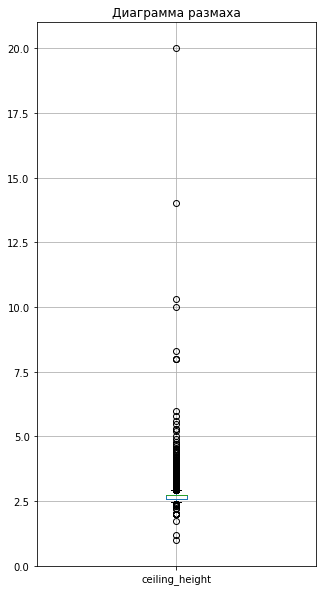

In [ ]:
data.boxplot('ceiling_height', figsize=(5,10))
plt.ylim(0, 21)
plt.xlim(0, 2)
plt.title('Диаграмма размаха')

Отфильтруем данные в границах нормальных значений (2.4 - 2.93):

Text(0, 0.5, 'Количество значений')

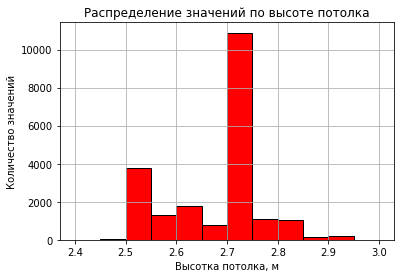

In [ ]:
(data
    .query('ceiling_height > 2.4 and ceiling_height < 2.93')
    .hist('ceiling_height', bins=12, range=(2.4,3), figsize=(6,4), color='r', edgecolor = 'black')
)
plt.title('Распределение значений по высоте потолка')
plt.xlabel('Высотка потолка, м')
plt.ylabel('Количество значений')

Самые популярные потолки:
- около 2.5 м (советский жилой фонд от хрущевок и далее?)
- около 2.7 м (современные новостройки)

##### Изучим данные в столбце floor_type:

Описание столбца с категориальными данными выведем отдельно и посмотрим на распределение уникаьных значений:

In [ ]:
data['floor_type'].describe()

count      23699
unique         3
top       другой
freq       17446
Name: floor_type, dtype: object

Text(0, 0.5, 'Количество значений')

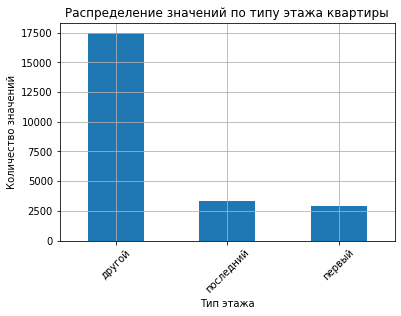

In [ ]:
(data['floor_type']
    .value_counts()
    .plot(kind='bar', grid=True, rot=45)
)
plt.title('Распределение значений по типу этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество значений')

Этажи. кроме первого и последнего, встречаются чаще всего. Логично.

##### Изучим данные в столбце floors_total:

Максимальное количество этажей = 60, минимальное = 1, в среднем =10.67. Boxplot:

Text(0.5, 1.0, 'Диаграмма размаха')

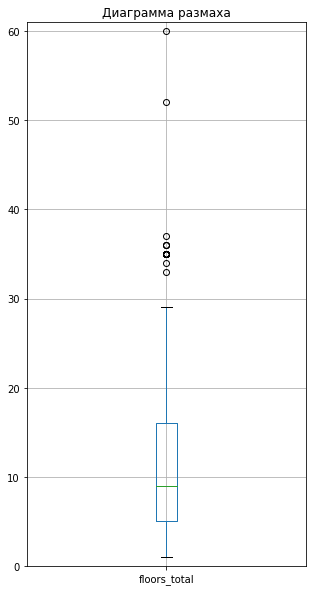

In [ ]:
data.boxplot('floors_total', figsize=(5,10))
plt.ylim(0, 61)
plt.xlim(0, 2)
plt.title('Диаграмма размаха')

Отфильтруем данные в границах нормальных значений (1 - 33):

Text(0, 0.5, 'Количество значений')

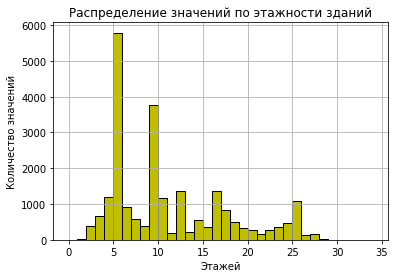

In [ ]:
(data
    .query('floors_total < 33')
    .hist('floors_total', bins=34, range=(0,34), figsize=(6,4), color='y', edgecolor = 'black')
)
plt.title('Распределение значений по этажности зданий')
plt.xlabel('Этажей')
plt.ylabel('Количество значений')

Основная этажность: 5, 9 этажей. Правдоподобно, пока реновация в полной мере еще не добралась до данного региона.

##### Изучим данные в столбце cityCenters_nearest:

Минимальное расстояние до центра = 181 м, максимальное = ~66 км. Посмотрим поближе:

In [ ]:
data.query('cityCenters_nearest < 200 or cityCenters_nearest > 60000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_cost,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
577,7,4.00,59.00,2017-07-23,3,2.50,5.00,37.00,1,False,False,False,7.00,0,поселок Молодежное,84665.00,65764.00,0,NaN,0,NaN,NaN,67796.61,6,7,2017,первый,66.00
2974,13,3.20,46.30,2018-03-31,2,2.50,3.00,29.20,2,False,False,False,7.00,1,Зеленогорск,81355.00,62454.00,0,NaN,0,NaN,205.00,69114.47,5,3,2018,другой,62.00
5218,15,3.65,53.80,2018-09-24,3,2.50,4.00,36.90,3,False,False,False,5.20,0,поселок Молодежное,83758.00,64857.00,0,NaN,0,NaN,121.00,67843.87,0,9,2018,другой,65.00
5340,19,3.60,50.60,2019-03-19,2,2.50,5.00,29.90,4,False,False,False,7.00,1,поселок Молодежное,84853.00,65952.00,0,NaN,0,NaN,NaN,71146.25,1,3,2019,другой,66.00
9640,8,4.20,51.40,2014-12-10,2,2.55,5.00,31.00,2,False,False,False,6.00,1,поселок Молодежное,84869.00,65968.00,0,NaN,0,NaN,1194.00,81712.06,2,12,2014,другой,66.00
13694,2,31.10,159.00,2018-06-25,5,3.28,5.00,106.00,5,False,False,False,15.00,0,Санкт-Петербург,21633.00,181.00,2,254.00,3,426.00,NaN,195591.19,0,6,2018,последний,0.00
16569,13,3.20,52.80,2017-06-20,2,2.55,5.00,29.90,3,False,False,False,8.30,0,Ломоносов,53042.00,61495.00,2,223.00,0,NaN,240.00,60606.06,1,6,2017,другой,61.00
18884,15,3.60,57.60,2019-02-08,3,2.55,3.00,41.30,2,False,False,False,6.50,1,Зеленогорск,81607.00,62706.00,0,NaN,0,NaN,13.00,62500.00,4,2,2019,другой,63.00
20746,1,3.30,43.50,2016-02-16,2,2.55,4.00,27.20,2,False,False,False,5.00,1,поселок Молодежное,84006.00,65105.00,0,NaN,0,NaN,1043.00,75862.07,1,2,2016,другой,65.00
23123,0,1.80,32.00,2018-07-17,1,2.73,2.00,17.00,1,False,False,False,6.00,0,Ломоносов,56896.00,60223.00,1,17.00,0,NaN,147.00,56250.00,1,7,2018,первый,60.00


181 м - до центра Петербурга. Большие же расстояния указываются не до центра самого поселения/города, а до центра г. Санкт-Петербург.

Text(0.5, 1.0, 'Диаграмма размаха')

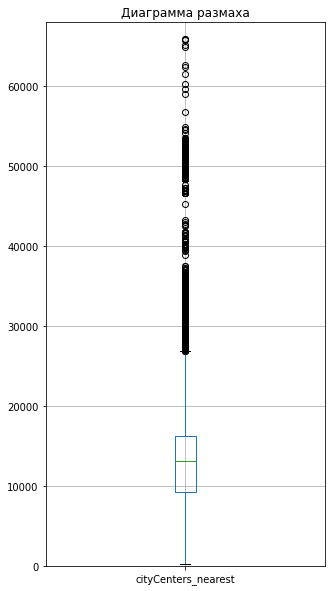

In [ ]:
data.boxplot('cityCenters_nearest', figsize=(5,10))
plt.ylim(0, 68000)
plt.xlim(0, 2)
plt.title('Диаграмма размаха')

Отфильтруем данные в границах нормальных значений (0 - 26880):

Text(0, 0.5, 'Количество значений')

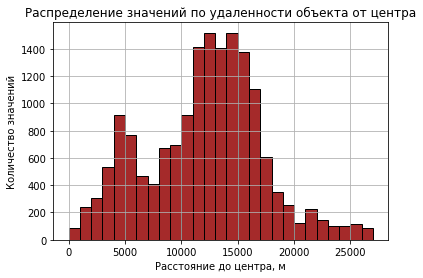

In [ ]:
(data
    .query('cityCenters_nearest < 26880')
    .hist('cityCenters_nearest', bins=27, range=(0,27000), figsize=(6,4), color='brown', edgecolor = 'black')
)
plt.title('Распределение значений по удаленности объекта от центра')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Количество значений')

Самые часто встречающиеся расстояния до центра города: 11-15 км. Получается, что это объекты недвижимости, расположенные в районе КАД (в т.ч. знаменитые застройки в Кудрово и Мурино).

##### Изучим данные в столбце parks_nearest:

Присутствуют значения > 3000 м, которые попали в DataFrame (в это же время parks_around3000 = 0). Есть парки, которые якобы расположены на расстоянии менее 5 м:

In [ ]:
data.query('parks_nearest > 3000 or parks_nearest < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_cost,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
1590,3,7.50,70.00,2017-07-11,2,2.73,18.00,37.00,13,False,False,False,10.00,0,Санкт-Петербург,14878.00,9791.00,0,3064.00,1,264.00,4.00,107142.86,1,7,2017,другой,10.00
10959,9,3.00,31.10,2017-03-21,1,2.73,5.00,17.70,2,False,False,False,5.50,0,Санкт-Петербург,14821.00,9734.00,0,3190.00,1,431.00,234.00,96463.02,1,3,2017,другой,10.00
11949,7,4.50,44.00,2017-11-24,2,2.60,9.00,30.00,7,False,False,False,7.00,0,Санкт-Петербург,11806.00,12292.00,1,3.00,1,508.00,82.00,102272.73,4,11,2017,другой,12.00
14624,8,3.77,45.40,2019-03-20,2,2.73,9.00,28.43,2,False,False,False,6.90,0,Санкт-Петербург,43932.00,16436.00,1,1.00,0,NaN,42.00,83039.65,2,3,2019,другой,16.00
19208,17,14.95,187.00,2017-10-12,5,3.00,2.00,80.00,2,False,False,False,17.00,1,Санкт-Петербург,36805.00,8656.00,0,3013.00,3,537.00,49.00,79946.52,3,10,2017,последний,9.00
19430,9,3.90,30.50,2018-02-22,1,2.60,5.00,16.50,1,False,False,False,5.50,0,Санкт-Петербург,14821.00,9734.00,0,3190.00,1,431.00,176.00,127868.85,3,2,2018,первый,10.00
22941,8,10.96,69.30,2019-01-10,1,3.00,4.00,48.90,4,True,False,False,NaN,2,Зеленогорск,73391.00,54490.00,3,4.00,1,217.00,110.00,158225.11,3,1,2019,последний,54.00


Т.к. эти значения близки к 3000 м, заполним значения в parks_around3000:

In [ ]:
data['parks_around3000'] = data['parks_around3000'].where(data['parks_nearest'] < 3000, '1')

Text(0.5, 1.0, 'Диаграмма размаха')

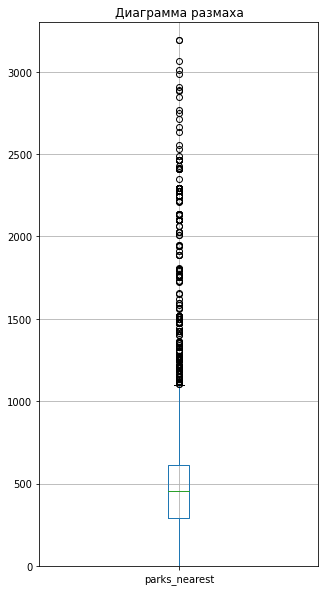

In [ ]:
data.boxplot('parks_nearest', figsize=(5,10))
plt.ylim(0, 3300)
plt.xlim(0, 2)
plt.title('Диаграмма размаха')

Отфильтруем данные в границах нормальных значений (0 - 1098):

Text(0, 0.5, 'Количество значений')

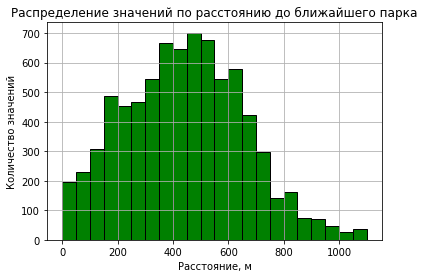

In [ ]:
(data
    .query('parks_nearest <= 1098')
    .hist('parks_nearest', bins=22, range=(0,1100), figsize=(6,4), color='g', edgecolor = 'black')
)
plt.title('Распределение значений по расстоянию до ближайшего парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество значений')

Распределение данных похоже на нормальное. Наибольшее число появлений значений приходится на расстояние до парка 350-500 м.

#### Изучение того, как быстро продавались квартиры

In [ ]:
data['days_exposition'].describe()

count   20518.00
mean      180.89
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

Среднее значение (180.89) сильно отмечается от медианы (95.00). Судя по максимальному значению, слишком большие значения смещают ср. арфиметическое вверх.

Построим гистограмму:

Text(0, 0.5, 'Количество значений')

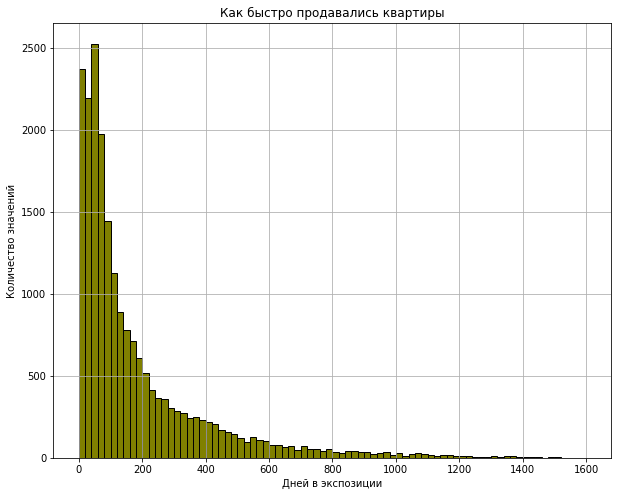

In [ ]:
(data
    .hist('days_exposition', bins=80, range=(0,1600), figsize=(10,8), color='olive', edgecolor = 'black')
)
plt.title('Как быстро продавались квартиры')
plt.xlabel('Дней в экспозиции')
plt.ylabel('Количество значений')

Выглядит неплохо, но интересно посмотреть на второй пик поближе:

Text(0, 0.5, 'Количество значений')

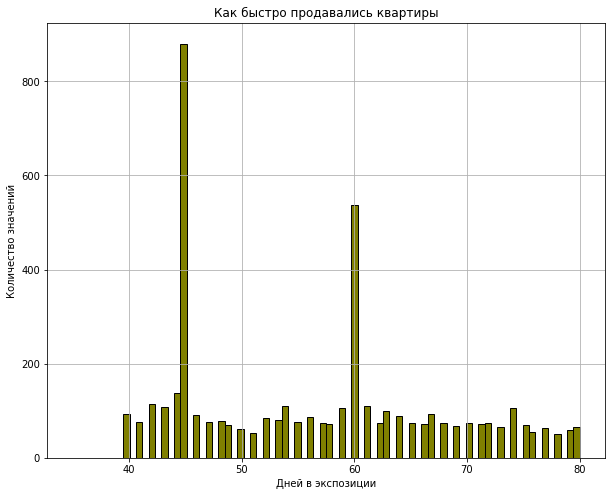

In [ ]:
(data
    .query('40 <= days_exposition <=80')
    .hist('days_exposition', bins=80, range=(35,80), figsize=(10,8), color='olive', edgecolor = 'black')
)
plt.title('Как быстро продавались квартиры')
plt.xlabel('Дней в экспозиции')
plt.ylabel('Количество значений')

Необычные всплески в на 45-й, 60-й день.

In [ ]:
data['days_exposition'].value_counts()

45.00      880
60.00      538
7.00       234
30.00      208
90.00      204
          ... 
969.00       1
1.00         1
1147.00      1
1148.00      1
1174.00      1
Name: days_exposition, Length: 1141, dtype: int64

In [ ]:
# Вспомним количество пропущенных значений
data['days_exposition'].isna().sum()

3181

Гистограмма и значения, полученные с помощью value_counts() показывают, что чаще всего продажа занимает 45 дней.

Быстрыми продажами можно считать те, которые проходят менее, чем за неделю. Т.е. неделя с момента размещения объявления до, как минимум, начала проведения сделки - это везение для продавца.

Бывает, объявления висят долго, особенно, рынок 'стоит'. Но даже в таком случае, думается, что необычно долгие продажи квартир (частные дома продаются сильно дольше), тем более в ликвидном месте (а СПб, без сомнения, ликвидное место) - 2 года и более.

Взглянем на диаграмму размаха:

Text(0.5, 1.0, 'Диаграмма размаха')

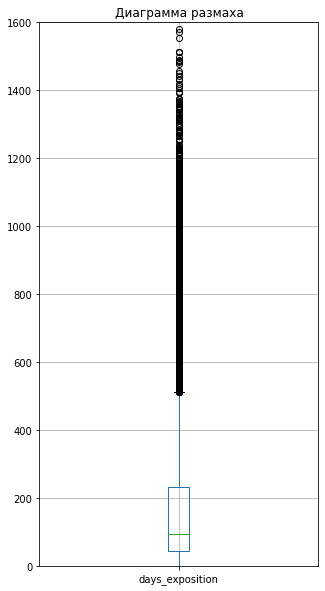

In [ ]:
data.boxplot('days_exposition', figsize=(5,10))
plt.ylim(0, 1600)
plt.xlim(0, 2)
plt.title('Диаграмма размаха')

Диаграмма размаха показывает, что верхняя граница нормальных значений заканчивается на отметке 513 дней (1.4 года).

#### Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта

Создание сводной таблицы и построение матрицы корреляций:

In [ ]:
# data_price_issue = data.pivot_table(index=['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'first_day_exposition'], values='last_price').reset_index()
data_price_total_area = data.pivot_table(index=['total_area'], values='last_price', aggfunc='median').reset_index()

In [ ]:
data_price_total_area

,total_area,last_price
0,12.00,2.40
1,13.00,1.85
2,13.20,1.69
3,14.00,1.19
4,15.00,1.73
...,...,...
2177,590.00,65.00
2178,618.00,300.00
2179,631.00,140.00
2180,631.20,140.00


In [ ]:
data_price_total_area.corr().style.background_gradient(cmap='coolwarm')

,total_area,last_price
total_area,1.000000,0.725791
last_price,0.725791,1.000000


##### Зависит ли цена от общей площади?

Цена имеет положительную корреляцию с общей площадью. <br>
Посмотрим на диаграмму размаха:

Text(0, 0.5, 'Цена, млн.')

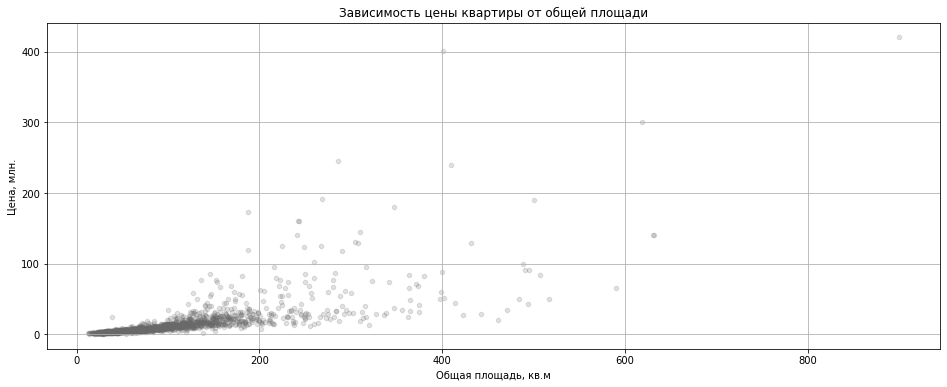

In [ ]:
data_price_total_area.plot(kind='scatter', x='total_area', y='last_price', figsize=(16,6), grid=True, alpha=0.2, color='dimgrey')
plt.title('Зависимость цены квартиры от общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Цена, млн.')

Также выведем картину поближе без выбросов, которые были определены на предыдущей стадии:

Text(0, 0.5, 'Цена, млн.')

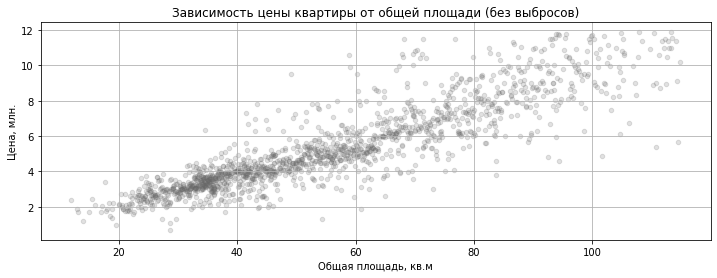

In [ ]:
(data_price_total_area
    .query('total_area >= 12 and total_area < 115')
    .query('last_price > 0.43 and last_price < 11.9')
    .plot(kind='scatter', x='total_area', y='last_price', figsize=(12,4), grid=True, alpha=0.2, color='dimgrey')
)
plt.title('Зависимость цены квартиры от общей площади (без выбросов)')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Цена, млн.')

Наблюдается достаточно четкий рост цены при увеличении площади квартиры. Однако, чем дальше от нормальных значений, тем зависимость прослеживается все меньше.

##### Зависит ли цена от жилой площади?

In [ ]:
data_price_living_area = data.pivot_table(index=['living_area'], values='last_price', aggfunc='median').reset_index()

In [ ]:
data_price_living_area.corr().style.background_gradient(cmap='coolwarm')

,living_area,last_price
living_area,1.000000,0.650230
last_price,0.650230,1.000000


Цена имеет положительную корреляцию с жилой площадью, но менее сильную, чем с общей площадью). <br>
Построим диаграмму размаха:

Text(0, 0.5, 'Цена, млн.')

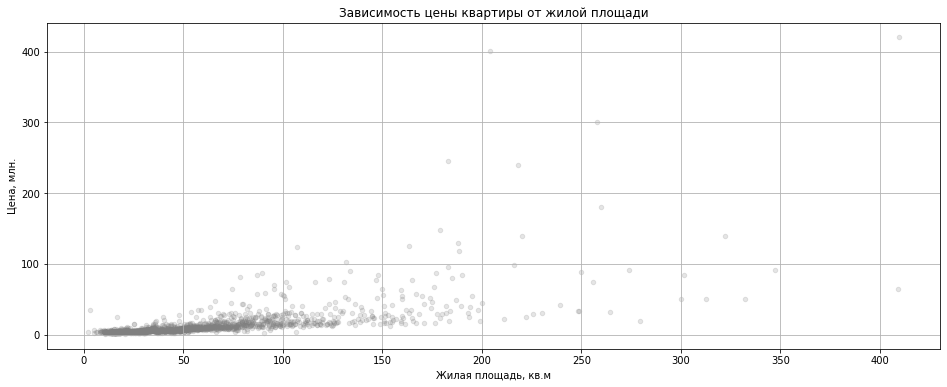

In [ ]:
data_price_living_area.plot(kind='scatter', x='living_area', y='last_price', figsize=(16,6), grid=True, alpha=0.2, color='grey')
plt.title('Зависимость цены квартиры от жилой площади')
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Цена, млн.')

Ситуация схожа с диаграммой размаха Общая-площадь-Цена: рост цены при увеличении жилой площади квартиры. Однако, чем дальше от нормальных значений, тем зависимость прослеживается все меньше.

##### Зависит ли цена от  площади кухни?

In [ ]:
data_price_kitchen_area = data.pivot_table(index=['kitchen_area'], values='last_price', aggfunc='median').reset_index()

In [ ]:
data_price_kitchen_area.corr().style.background_gradient(cmap='coolwarm')

,kitchen_area,last_price
kitchen_area,1.000000,0.628921
last_price,0.628921,1.000000


Наблюдается положительная корреляция в паре площадь_кухни-цена. Ее значение примерно такое же, как в зависимости цены от жилой площади.

Text(0, 0.5, 'Цена, млн.')

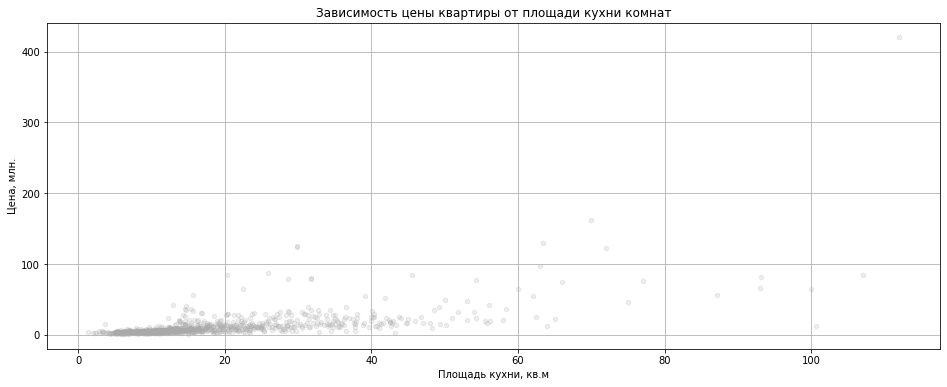

In [ ]:
data_price_kitchen_area.plot(
    kind='scatter', x='kitchen_area', y='last_price', figsize=(16,6), grid=True, alpha=0.2, color='darkgrey'
)
plt.title('Зависимость цены квартиры от площади кухни комнат')
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Цена, млн.')

Разброс чуть более 'пологий': при увеличении площади кухни, цена растет, но менее охотно, чем в других зависимостях, рассмотренных ранее.

##### Зависит ли цена от количества комнат?

In [ ]:
data_price_rooms = data.pivot_table(index=['rooms'], values='last_price', aggfunc='median').reset_index()

In [ ]:
data_price_rooms.corr().style.background_gradient(cmap='coolwarm')

,rooms,last_price
rooms,1.000000,0.286098
last_price,0.286098,1.000000


Если смотреть корреляцию, то ее значение небольшое (0.27). Представим график зависимости цены от количества комнат (с выбросами и без них):

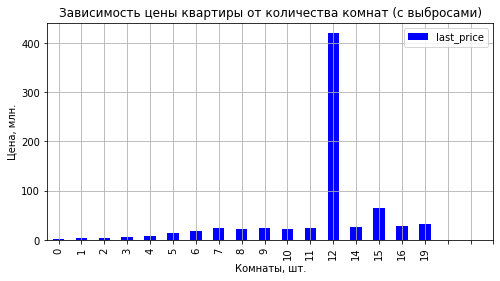

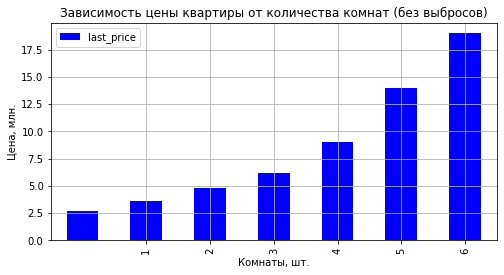

In [ ]:
data_price_rooms.plot(kind='bar', x='rooms', y='last_price', figsize=(8,4), grid=True, color='b')
plt.title('Зависимость цены квартиры от количества комнат (с выбросами)')
plt.xlabel('Комнаты, шт.')
plt.ylabel('Цена, млн.')
plt.xticks(np.arange(min(data_price_rooms['rooms']), max(data_price_rooms['rooms'])+1, 1.0))
plt.yticks(np.arange(0, max(data_price_rooms['last_price']), 100.0))

(data_price_rooms
    .query('rooms <= 6')
    .plot(kind='bar', x='rooms', y='last_price', figsize=(8,4), grid=True, color='b') \
)
plt.title('Зависимость цены квартиры от количества комнат (без выбросов)')
plt.xlabel('Комнаты, шт.')
plt.ylabel('Цена, млн.')
plt.xticks(np.arange(1, 7, 1.0))
plt.show()

Судя по графику чем больше комнат, тем выше цена, но до определенного уровня. После 7 комнат, медианная цена уже не растет (за исключением сильного выброса царь-квартиры с 12 комнатами). Если очистить график от выбросов, то остается 6 комнат и график, похожий на степенную зависимость.

##### Зависит ли цена от  этажа, на котором расположена квартира (первый, последний, другой)?

In [ ]:
data_price_floor = data.pivot_table(index=['floor_type'], values='last_price', aggfunc='median').reset_index()

In [ ]:
data_price_floor

,floor_type,last_price
0,другой,4.85
1,первый,3.90
2,последний,4.30


Text(0, 0.5, 'Цена, млн.')

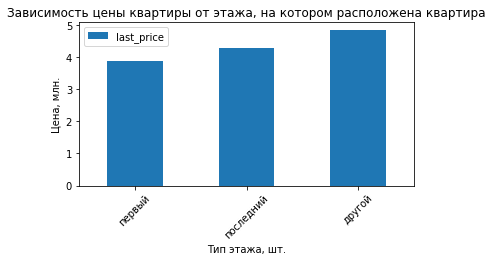

In [ ]:
data_price_floor.sort_values(by='last_price').plot(kind='bar', x='floor_type', y='last_price', figsize=(6,3), rot=45)
plt.title('Зависимость цены квартиры от этажа, на котором расположена квартира')
plt.xlabel('Тип этажа, шт.')
plt.ylabel('Цена, млн.')

Видим, что первый этаж - самый дешевый. Так и есть. Последний - дороже, но уступает 'другим'.
Интересно, что при построении графика со средними значениями цены, а не медианными, поледний этаж получался самым дорогим.

##### Зависит ли цена от  даты размещения (день недели, месяц, год)?

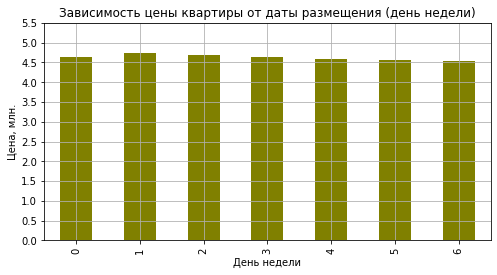

In [ ]:
(data
    .pivot_table(index=['exposition_weekday'], values='last_price', aggfunc='median').reset_index()
    .plot(kind='bar', x='exposition_weekday', y='last_price', figsize=(8,4), grid=True, color='olive', legend=False)
)

plt.title('Зависимость цены квартиры от даты размещения (день недели)')
plt.xlabel('День недели')
plt.ylabel('Цена, млн.')
plt.yticks(np.arange(0, 6, 0.5))
plt.show()

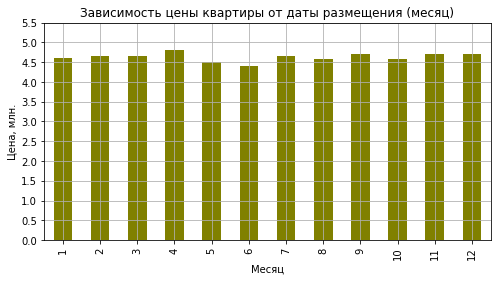

In [ ]:
(data
    .pivot_table(index=['exposition_month'], values='last_price', aggfunc='median').reset_index()
    .plot(kind='bar', x='exposition_month', y='last_price', figsize=(8,4), grid=True, color='olive', legend=False)
)
plt.title('Зависимость цены квартиры от даты размещения (месяц)')
plt.xlabel('Месяц')
plt.ylabel('Цена, млн.')
plt.yticks(np.arange(0, 6, 0.5))
plt.show()

Разбивка по сезонам:

In [ ]:
data['exposition_season'] = data['exposition_month']
data.loc[(data['exposition_season'] == 1) | (data['exposition_season'] == 2) | (data['exposition_season'] == 12), 'exposition_season'] = 'зима'
data.loc[(data['exposition_season'] == 3) | (data['exposition_season'] == 4) | (data['exposition_season'] == 5), 'exposition_season'] = 'весна'
data.loc[(data['exposition_season'] == 6) | (data['exposition_season'] == 7) | (data['exposition_season'] == 8), 'exposition_season'] = 'лето'
data.loc[(data['exposition_season'] == 9) | (data['exposition_season'] == 10) | (data['exposition_season'] == 11), 'exposition_season'] = 'осень'

In [ ]:
data_price_season = data.pivot_table(index=['exposition_season'], values='last_price', aggfunc='median').reset_index()

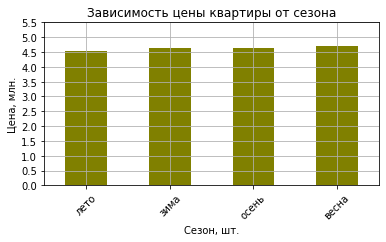

In [ ]:
(data_price_season
    .sort_values(by='last_price')
    .plot(kind='bar', x='exposition_season', y='last_price', figsize=(6,3), rot=45, color='olive', legend=False, grid=True)
)
plt.title('Зависимость цены квартиры от сезона')
plt.xlabel('Сезон, шт.')
plt.ylabel('Цена, млн.')
plt.yticks(np.arange(0, 6, 0.5))
plt.show()

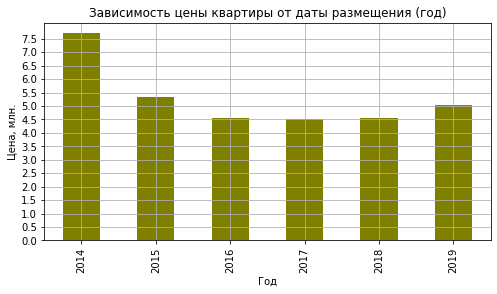

In [ ]:
(data
    .pivot_table(index=['exposition_year'], values='last_price', aggfunc='median').reset_index()
    .plot(kind='bar', x='exposition_year', y='last_price', figsize=(8,4), grid=True, color='olive', legend=False)
)
plt.title('Зависимость цены квартиры от даты размещения (год)')
plt.xlabel('Год')
plt.ylabel('Цена, млн.')
plt.yticks(np.arange(0, 8, 0.5))
plt.show()

In [ ]:
data.pivot_table(index=['exposition_year'], values='last_price', aggfunc='median').reset_index()

,exposition_year,last_price
0,2014,7.70
1,2015,5.35
2,2016,4.55
3,2017,4.50
4,2018,4.55
5,2019,5.05


Цена на объект практически не зависит от дня недели (цена колеблется возле 4.5 млн).<br>
Зависимость от месяца чуть более выражена (диапазон цен: 4.4-4.8 млн). Июнь - самые низкие продажи, апрель - самые высокие.<br>
Зависимость от года - еще более выражена (диапазон цен: 4.5-7.7). В 2014 году было больше всего продаж (из-за геополитических событий).

Из всех рассмотренных параметров наибольшая зависимость цены объекта наблюдается от общей площади квартиры.

#### Выделение населённых пунктов с самой высокой и низкой стоимостью квадратного метра

In [ ]:
data['sq_meter_price'] = (data['last_price'] / data['total_area'] * 1000).round(0)

In [ ]:
'''
Данный способ дал некорректный результат:

data_top10 = data['locality_name'].value_counts()[:10].reset_index()
data_top10['sq_meter_price'] = data['sq_meter_price']
data_top10.rename(columns = {'index':'locality_name', 'locality_name':'total_expositions'}, inplace = True)
data_top10
'''

"\nДанный способ дал некорректный результат:\n\ndata_top10 = data['locality_name'].value_counts()[:10].reset_index()\ndata_top10['sq_meter_price'] = data['sq_meter_price']\ndata_top10.rename(columns = {'index':'locality_name', 'locality_name':'total_expositions'}, inplace = True)\ndata_top10\n"

In [ ]:
data_top10 = data.copy()
data_top10['sq_meter_price'] = data['sq_meter_price']
data_top10 = data_top10.groupby('locality_name')['sq_meter_price'] \
    .agg(['count', 'median', 'mean']).sort_values(by='count', ascending=False)[:10].reset_index()
data_top10.rename(columns = {'locality_name':'Населенный пункт', 'count':'Число объявлений', 'median':'Медианная цена за кв.м, тыс.', 'mean':'Средняя цена за кв.м, тыс.'}, inplace = True)
data_top10

,Населенный пункт,Число объявлений,"Медианная цена за кв.м, тыс.","Средняя цена за кв.м, тыс."
0,Санкт-Петербург,15721,105.00,114.86
1,Мурино,590,86.00,86.08
2,поселок Шушары,440,77.00,78.70
3,Всеволожск,398,66.00,68.64
4,Пушкин,369,100.00,103.12
5,Колпино,338,75.00,75.43
6,поселок Парголово,327,92.00,90.14
7,Гатчина,307,68.00,68.75
8,деревня деревня Кудрово,299,92.00,92.51
9,Выборг,237,58.00,58.09


Из топ-10 населенных пунктов по количеству объявлений:
- первую строчку по средней стоимости 'квадрата' занимает Санкт-Петербург;
- последняя строчка - у Выборга.

#### Выявление закономерности: как стоимость объектов зависит от расстояния до центра города

Вычислим среднюю стоимость объектов в Санкт-Петербурге на разном удалении от города:

In [ ]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург'] \
    .groupby('cityCenters_nearest_km')['last_price'].agg(['mean', 'median']).reset_index()
data_spb.rename(columns = {'cityCenters_nearest_km':'Расстояние до центра города, км', 'mean':'Цена (ср. арифметическая)', 'median':'Цена (медиана)'}, inplace = True)
data_spb

,"Расстояние до центра города, км",Цена (ср. арифметическая),Цена (медиана)
0,0.00,31.45,17.90
1,1.00,21.21,11.39
2,2.00,17.79,10.00
3,3.00,11.13,8.41
4,4.00,13.30,9.20
5,5.00,14.50,9.50
6,6.00,15.34,8.90
7,7.00,14.78,7.80
8,8.00,9.96,7.45
9,9.00,6.97,5.30


Построим график:

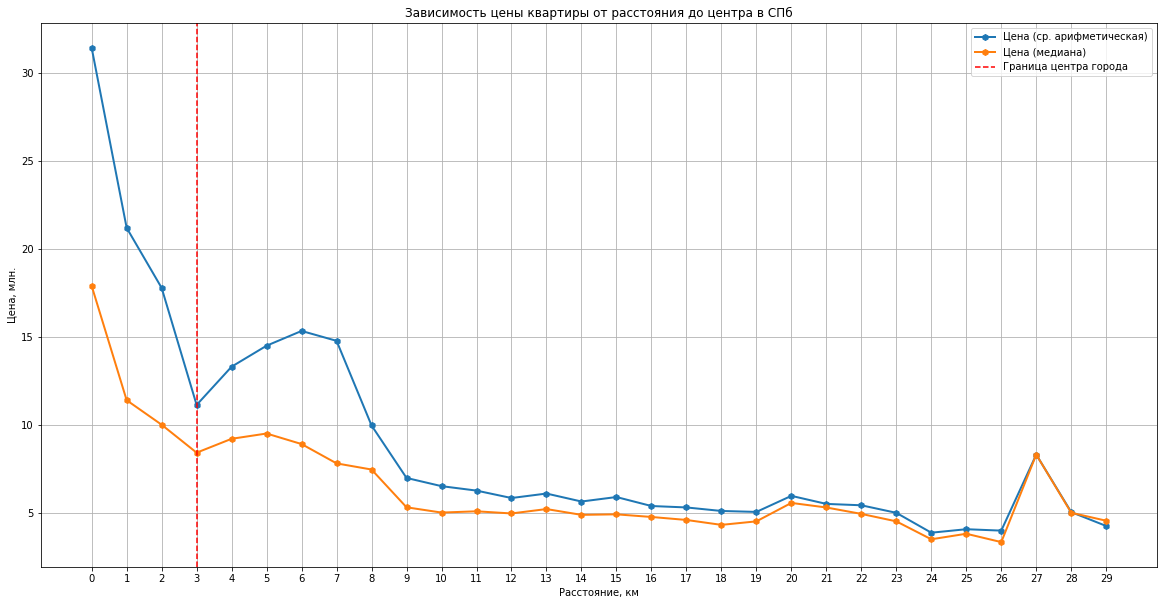

In [ ]:
ax = data_spb.plot(
    x='Расстояние до центра города, км', y='Цена (ср. арифметическая)', style='h-', figsize=(20, 10), grid=True, linewidth=2
)
data_spb.plot(
    x='Расстояние до центра города, км', y='Цена (медиана)', ax=ax, style='h-', figsize=(20, 10), grid=True, linewidth=2
)
plt.axvline (x=3, color='red', linestyle='--', label='Граница центра города')
plt.title('Зависимость цены квартиры от расстояния до центра в СПб')
plt.xlabel('Расстояние, км')
plt.ylabel('Цена, млн.')
plt.xticks(np.arange(0, 30, 1))
plt.legend() #добавил подпись границы центра
pass # вместо plt.show() сегодня на вебинаре узнал, что можно поставить заглушку 'pass'.

В целом, чем ближе к центру, тем дороже. В российской действительности - логично. Но что за всплеск на расстояии 27 км?

In [ ]:
data[data['cityCenters_nearest_km'] == 27]['locality_name'].value_counts()

Пушкин                     68
поселок Металлострой       31
Санкт-Петербург             2
поселок Александровская     1
поселок Петро-Славянка      1
Красное Село                1
Name: locality_name, dtype: int64

Понятно. Пушкин (Царское Село) - красивый город с обилием отличных исторических зданий (включён в список памятников, охраняемых ЮНЕСКО, в составе объекта «Исторический центр Санкт-Петербурга и связанные с ним комплексы памятников». Вики).<br> Еще в выборку попал п. Металлострой. По нему сказать, увы, нечего. <br>

---

ВЫВОД:

На данном этапе проведен исследовательский анализ данных: <br>
- обработаны редкие и выбивающиеся значения; <br>
- были изучены отдельные признаки DataFrame, а также описаны наблюдения;<br>
- выявлено, сколько времени обычно занимает продажа квартиры, а также определен фактор, который наиболее сильно влияет на цену - объекта; <br>
- выделены населенные пункты с самой высокой и самой низкой ценой квадратного метра; <br>
- рассмотрено, как стоимость объектов зависит от расстояния до центра города (для Санкт-Петербурга).



### Напишите общий вывод

ОБЩИЙ ВЫВОД:

Полученный в качестве исходных данных DataFrame потребовал предварительной обработки. <br>
Так, были заполнены пропуски там, где это возможно. Некоторые признаки требовали изменения типа данных. Также были удалены неявные дубликаты (неявное дублирование названий населенных пунктов). Произведена проверка на наличие явных дубликатов (они отсутствуют).

Далее в датафрейм добавлены новые столбцы, которые в дальнейшем помогли в исследовательском анализе: определить рыночную стоимость объектов недвижимости.

Итак, при прочих равных:<br>
- бОльшая площадь - бОльшая цена (касается и общей плоащди, и жилой, и площади кухни); <br>
- больше комнат - больше стоимость (в общем, чем больше комнат, тем больше, зачастую, площадь);  <br>
- этажи, находящиеся между первым и последним - дороже;<br>
- зависимость цены от дня недели, месяца - слабо выражена. Можно отметить, что в будни - чуть дороже. Также можно отметить, что летом - немного дешевле, весной - цена немного выше, чем в другие сезоны; <br>
- зависимость от года тоже слабо выражена. Единственное, выбивается только 2014 год (геополитические события); <br>
- самый дорогой город - Санкт-Петербург, за ним сделует Пушкин; <br>
- на примере Петербурга показано, что тем ближе к центру города, тем выше цена.





---